In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('segmented_customers.csv')
df = df.drop(columns={'Unnamed: 0'})
df 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

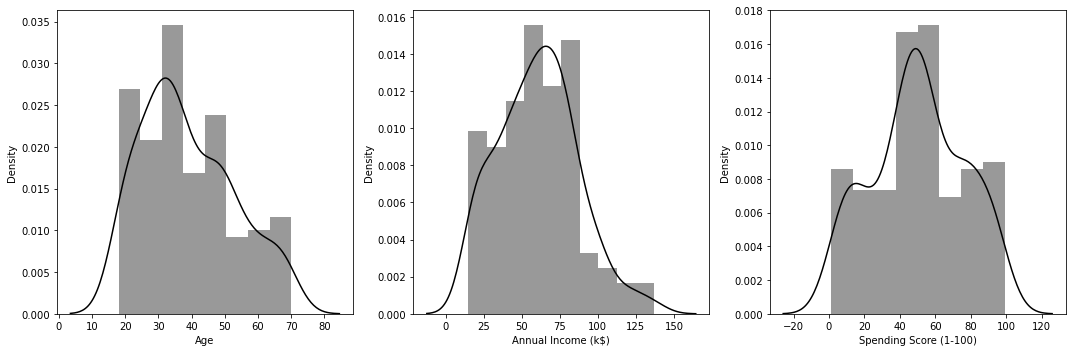

In [7]:
#Data distribution
plt.figure(figsize=(15,5))
for ind, col in enumerate(df.columns[2:]):
    plt.subplot(1,3, ind+1)
    sns.distplot(df[col], color='black')
plt.tight_layout()
plt.show()

<Figure size 864x720 with 0 Axes>

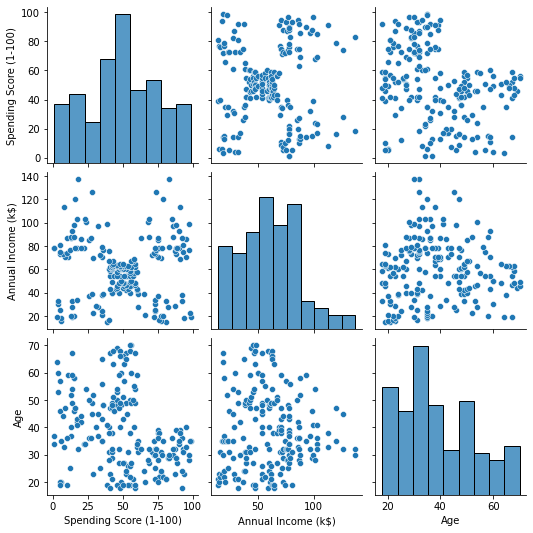

In [8]:
plt.figure(figsize=(12,10))
sns.pairplot(df,vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'])
plt.show()

### K-means Model: Annual Income and Spending Score

Plotting data

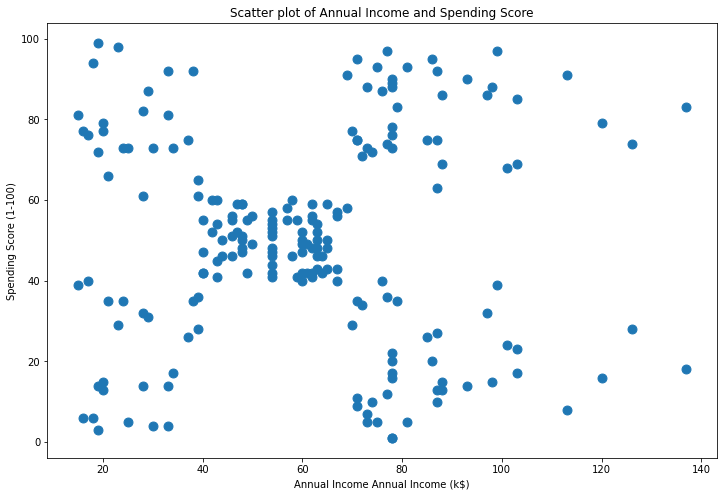

In [9]:
plt.figure(figsize =(12,8))
plt.title('Scatter plot of Annual Income and Spending Score')
plt.xlabel('Annual Income Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, s=80)
plt.show()

Choosing K

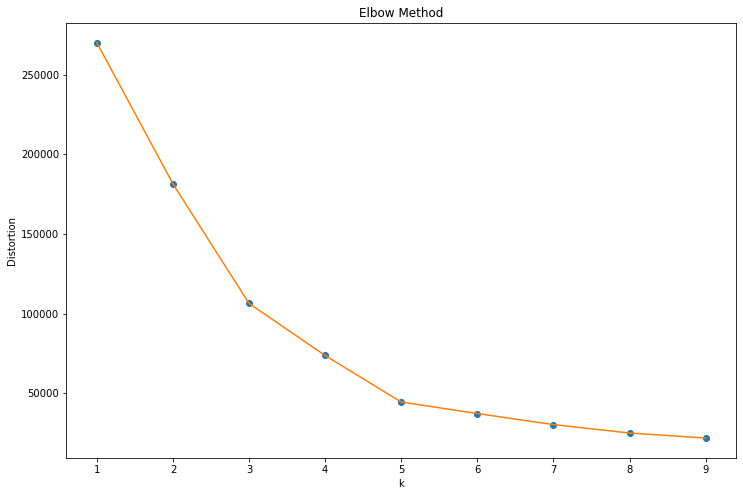

In [10]:
# Get inertia with 10 K
X = df.loc[:,['Annual Income (k$)' , 'Spending Score (1-100)']].values
K = range(1,10)
distortions = []
for k in K:
    model = KMeans(n_clusters=k, init='k-means++', n_init=15, max_iter=350)
    model.fit(X)
    distortions.append(model.inertia_)
    
# Visualize result
plt.figure(figsize=(12,8))
plt.plot(K, distortions, 'o')
plt.plot(K, distortions, '-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

Building model with K = 5

In [11]:
X = df.loc[:,['Annual Income (k$)' , 'Spending Score (1-100)']].values
# Init model with k=5
#                 k-means++: init centroids on data to boost speed
#                 n-init=15: 15 times of seeding centroids
#                 max_iter=350: looping 350 times for each seed
model = KMeans(n_clusters = 5, init='k-means++', n_init = 15, max_iter=350)
model.fit(X)

# clustering data
labels = model.labels_

# getting centroids coordinates (matrix 5,2)
centroids = model.cluster_centers_

In [12]:
# add labels for records
df['labels'] = labels

Sum of Squared Error: 44448.45544793371


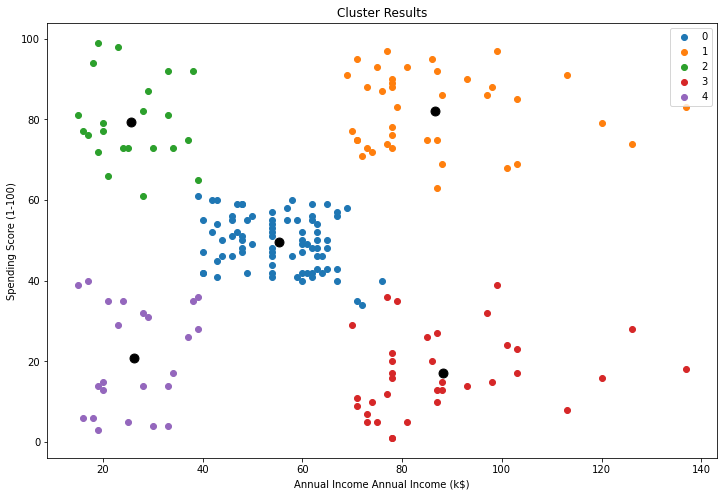

In [13]:
# print SSE
print(f'Sum of Squared Error: {model.inertia_}')

# VISUALIZATION
plt.figure(figsize=(12,8))
#unique labels
u_labels = np.unique(labels)

#visualizing labeled data
for i in u_labels:
    df_filtered = df[df['labels'] == i]
    col_annual = df_filtered['Annual Income (k$)']
    col_spending = df_filtered['Spending Score (1-100)']
    plt.scatter(col_annual, col_spending , label = i)

# visualizing cluster
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')

# title
plt.title('Cluster Results')
plt.xlabel('Annual Income Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()